In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('Daily_Gold_Price_on_World.csv')
TempData.head()

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,1979-01-01,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
1,1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,0.0,0.0,735.60,138160.45,851.29,4454.55,0.0,0.0,107470.04,0.0,194.56,193.61
2,1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,0.0,0.0,739.42,138877.01,855.71,4477.66,0.0,0.0,108027.43,0.0,192.23,192.97
3,1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,0.0,0.0,743.36,139616.26,860.26,4501.49,0.0,0.0,108602.47,0.0,193.01,194.55
4,1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,0.0,0.0,756.42,142069.10,875.38,4580.57,0.0,0.0,110510.44,0.0,196.40,197.94


In [3]:
GoldPrice = TempData.dropna()


GoldPrice.index = pd.to_datetime(GoldPrice.Date)
  
GoldPrice = GoldPrice["US dollar (USD)"]['2021-01-01':'2022-03-11']
GoldPrice.describe()

count     311.000000
mean     1808.540354
std        56.607364
min      1683.950000
25%      1774.775000
50%      1800.200000
75%      1837.850000
max      2039.050000
Name: US dollar (USD), dtype: float64

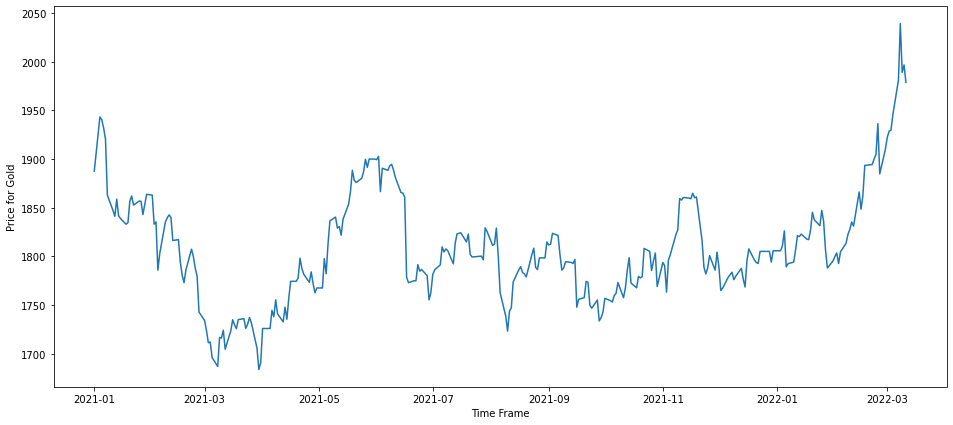

In [5]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Price for Gold')
ax1.plot(GoldPrice)

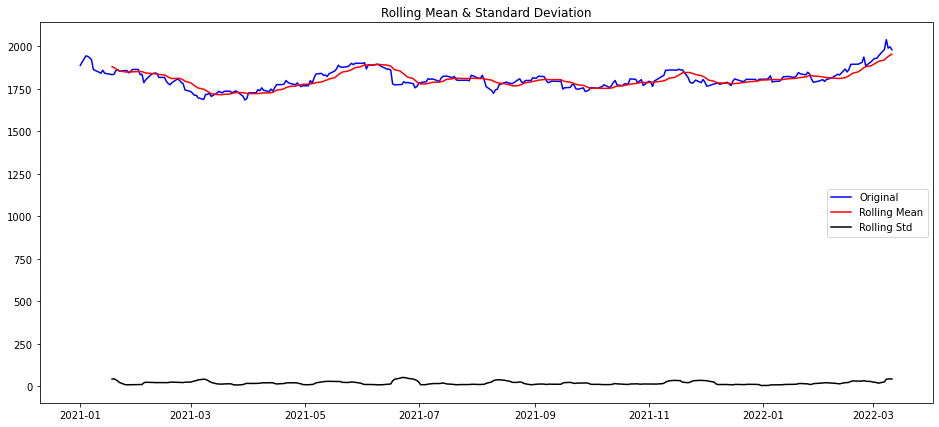

In [46]:
#Determing rolling statistics
rolLmean = GoldPrice.rolling(12).mean()
rolLstd = GoldPrice.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(GoldPrice, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [47]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [48]:
adf_test(GoldPrice)

1. ADF :  -1.9881257968679853
2. P-Value :  0.29180367010842845
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


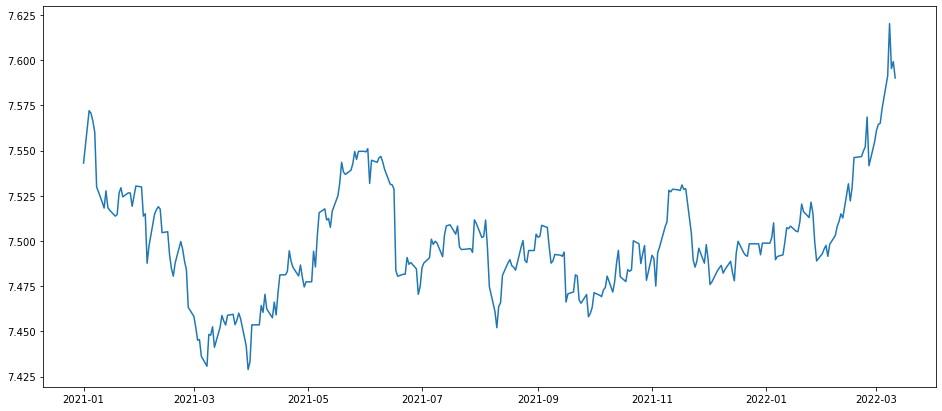

In [49]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(GoldPrice)
plt.plot(ts_log)

In [50]:
adf_test(ts_log)

1. ADF :  -2.0403673633816473
2. P-Value :  0.2691585636388336
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


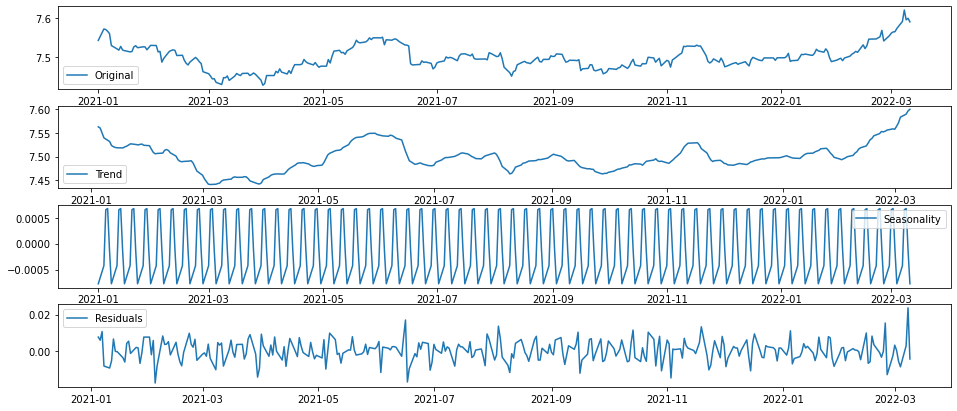

In [51]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model = 'additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

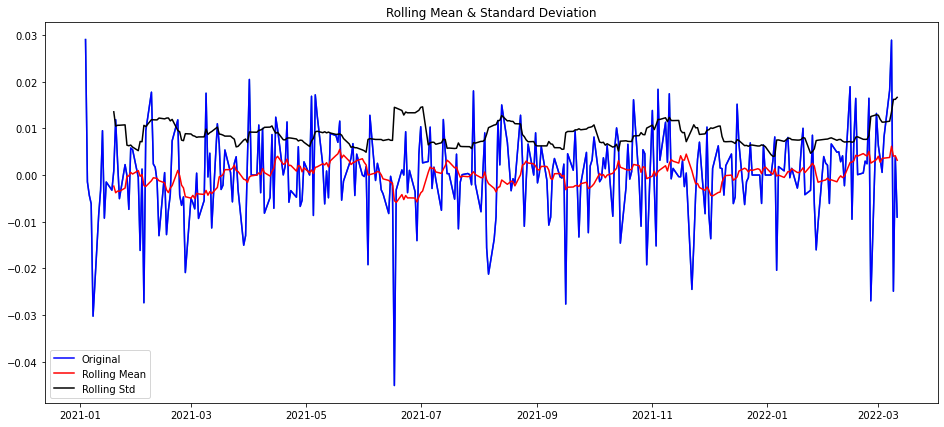

In [52]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [53]:
adf_test(ts_log_diff.dropna())

1. ADF :  -17.936085945838673
2. P-Value :  2.8717449165699802e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 309
5. Critical Values :
	 1% :  -3.45169128009473
	 5% :  -2.8709394227049154
	 10% :  -2.5717780602423517


In [54]:
GoldPrice.sort_index(inplace= True)

In [55]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


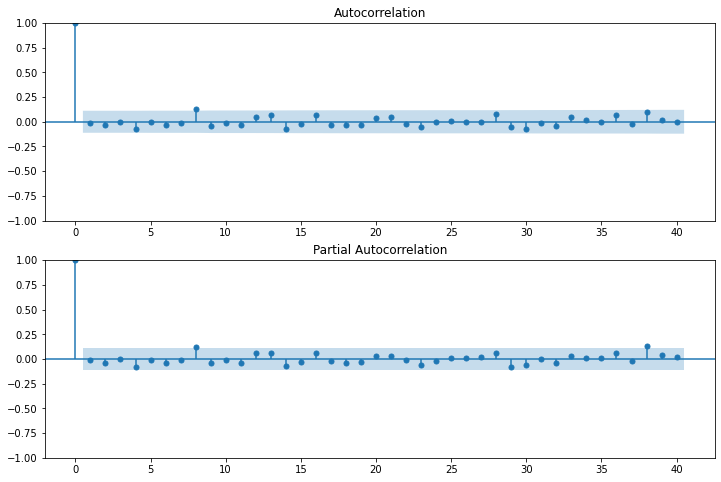

In [56]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [57]:
from statsmodels.tsa.arima_model import ARIMA

In [58]:
import statsmodels.api as sm

In [59]:
type(ts_log_diff)

pandas.core.series.Series

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


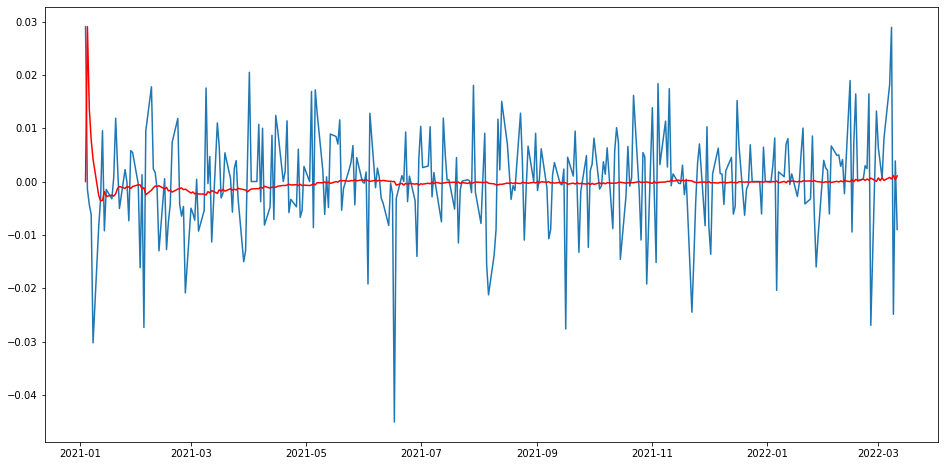

In [101]:
plt.figure(figsize=(16,8))
ts_log_diff.dropna(inplace=True)
X = ts_log_diff.dropna()
train = X[:len(X)-100]
test = X[len(X)-100:]
model = sm.tsa.arima.ARIMA(ts_log_diff, order=(2,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [100]:
len(train)

210

In [103]:
pred= results_ARIMA.predict(start=len(train), end=len(X)-1, dynamic= False)

In [104]:
pred 

2021-10-25   -0.000016
2021-10-26   -0.000166
2021-10-27   -0.000153
2021-10-28   -0.000140
2021-10-29   -0.000081
                ...   
2022-03-07    0.000761
2022-03-08    0.000479
2022-03-09    0.001135
2022-03-10    0.000328
2022-03-11    0.001051
Freq: B, Name: predicted_mean, Length: 100, dtype: float64

In [61]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2021-01-04    0.000000
2021-01-05    0.029030
2021-01-06    0.013670
2021-01-07    0.007832
2021-01-08    0.004159
dtype: float64


In [62]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2021-01-04    0.000000
2021-01-05    0.029030
2021-01-06    0.042700
2021-01-07    0.050532
2021-01-08    0.054691
dtype: float64


In [63]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2021-01-01    7.543061
2021-01-04    7.543061
2021-01-05    7.572091
2021-01-06    7.585761
2021-01-07    7.593593
dtype: float64

Text(0.5, 1.0, 'RMSE: 99.6763')

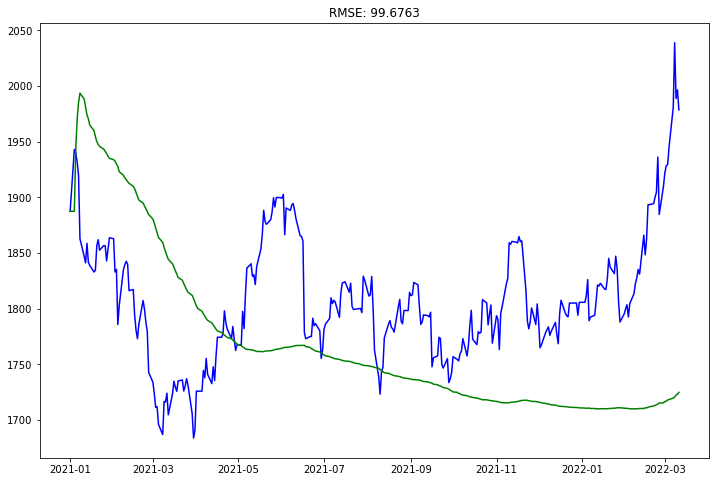

In [64]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(GoldPrice, color="blue")
plt.plot(predictions_ARIMA, color = "green")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-GoldPrice)**2)/len(GoldPrice)))

In [68]:
!pip install pmdarima

In [69]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [70]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2007.732, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2019.245, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2017.271, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2017.272, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2021.161, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2015.346, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.539 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


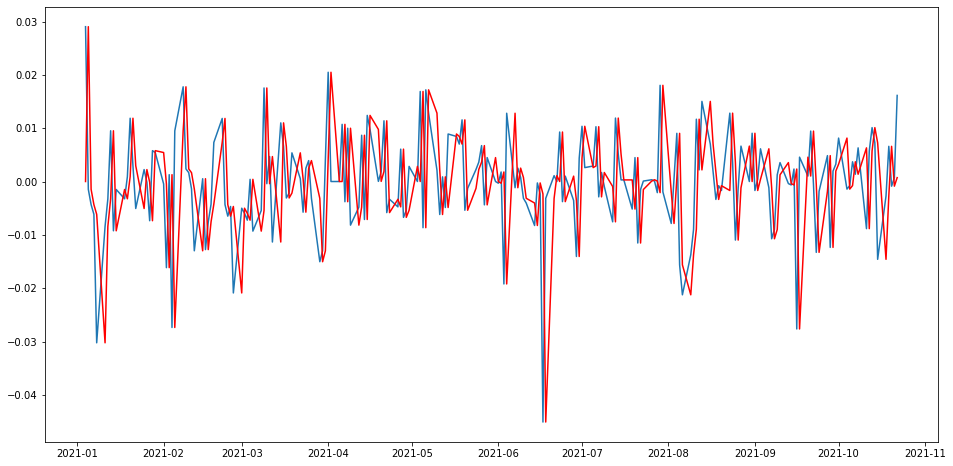

In [113]:
plt.figure(figsize=(16,8))
ts_log_diff.dropna(inplace=True)
X = ts_log_diff.dropna()
train = X[:len(X)-100]
test = X[len(X)-100:]
model = sm.tsa.arima.ARIMA(train, order=(0,1,0))  
results_ARIMA = model.fit()  
plt.plot(train)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [73]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2021-01-04    0.000000
2021-01-05    0.029030
2021-01-06   -0.001468
2021-01-07   -0.004339
2021-01-08   -0.006153
dtype: float64


In [74]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2021-01-04    0.000000
2021-01-05    0.029030
2021-01-06    0.027562
2021-01-07    0.023224
2021-01-08    0.017071
dtype: float64


In [116]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

2021-01-01    7.543061
2021-01-04    7.543061
2021-01-05    7.543061
2021-01-06    7.543061
2021-01-07    7.543061
dtype: float64

Text(0.5, 1.0, 'RMSE: 96.0373')

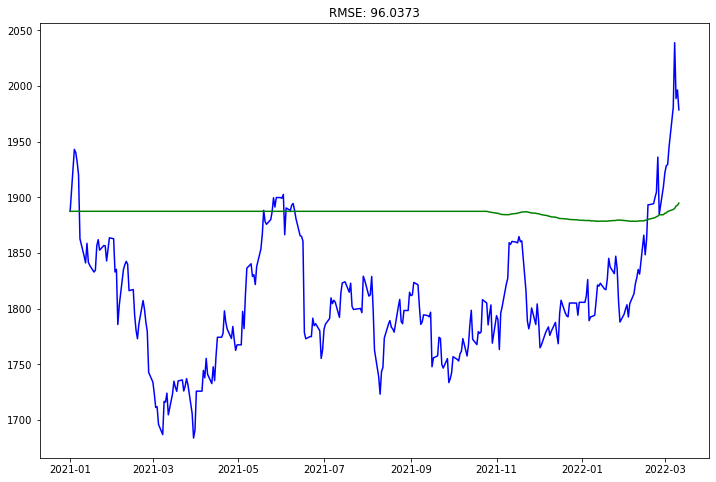

In [117]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(GoldPrice, color = "blue")
plt.plot(predictions_ARIMA, color = "green")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-GoldPrice)**2)/len(GoldPrice)))

In [118]:
ts_log_diff

Date
2021-01-04    0.029030
2021-01-05   -0.001468
2021-01-06   -0.004339
2021-01-07   -0.006153
2021-01-08   -0.030243
                ...   
2022-03-07    0.018160
2022-03-08    0.028907
2022-03-09   -0.024902
2022-03-10    0.003864
2022-03-11   -0.009006
Name: US dollar (USD), Length: 310, dtype: float64

In [123]:
predictions_ARIMA.tail(100)

2021-10-25    1887.569531
2021-10-26    1887.256203
2021-10-27    1886.967298
2021-10-28    1886.703712
2021-10-29    1886.551054
                 ...     
2022-03-07    1889.281177
2022-03-08    1890.186660
2022-03-09    1892.334143
2022-03-10    1892.955105
2022-03-11    1894.945073
Length: 100, dtype: float64

In [164]:
T = GoldPrice

In [165]:
train1 = T[:len(T)-100]
test1 = T[len(T)-100:]

In [226]:
model = sm.tsa.arima.ARIMA(T, order=(0,1,0))  
fitted = model.fit() 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [227]:
fc = fitted.forecast(test1.shape[0], alpha=0.05) 

In [228]:
fc = fitted.get_forecast(test1.shape[0], alpha=0.05)

In [190]:
fc_series = pd.Series(fc.predicted_mean, index=test1.index)
lower_series = pd.Series(fc.conf_int()['lower US dollar (USD)'])
upper_series = pd.Series(fc.conf_int()['upper US dollar (USD)'])

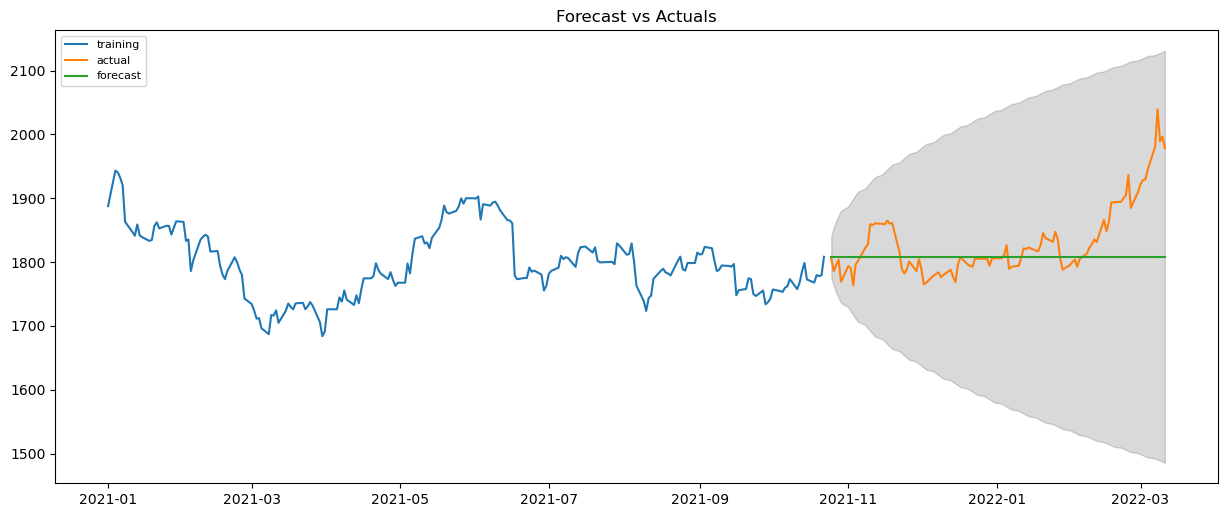

In [229]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [192]:
details = {'Model':[],'RMSE':[],'MAPE':[],'MAE':[]}

import statsmodels, math
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error

In [194]:
mse = mean_squared_error(T.values[-100:],fc_series)
print("The RMSE is:",math.sqrt(mse))

mape = mean_absolute_percentage_error(T.values[-100:],fc_series)
print("The MAPE is:",mape)

mae = mean_absolute_error(T.values[-100:],fc_series)
print("The MAE is:",mae)


details['Model'].append("ARIMA")
details['RMSE'].append(math.sqrt(mse))
details['MAPE'].append(mape)
details['MAE'].append(mae)

The RMSE is: 61.053485772722254
The MAPE is: 0.020964581258391245
The MAE is: 39.596499999999985


In [231]:
yhat_forecast = fitted.get_prediction(start=310,end=330)

future_series_1 = pd.Series(yhat_forecast.predicted_mean)
lower_series_1 = pd.Series(yhat_forecast.conf_int()['lower US dollar (USD)'])
upper_series_1 = pd.Series(yhat_forecast.conf_int()['upper US dollar (USD)'])

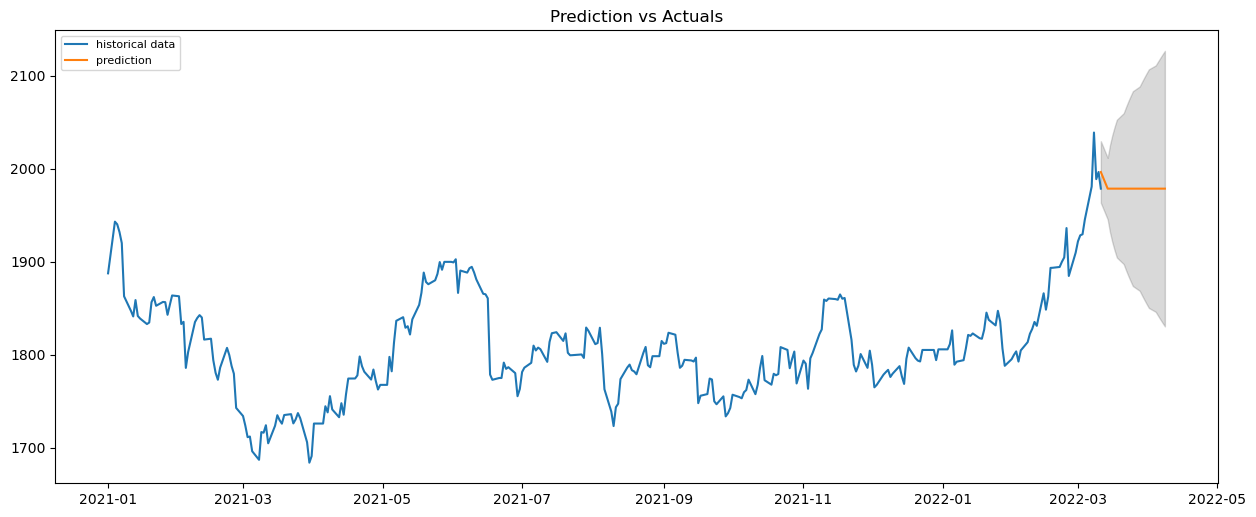

In [232]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(T[-400:], label='historical data')
plt.plot(future_series_1, label='prediction')
plt.fill_between(lower_series_1.index, lower_series_1, upper_series_1, color='k', alpha=.15)

plt.title('Prediction vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [218]:
future = fitted.get_prediction(start=310,end=330)
future_series = pd.Series(future.predicted_mean)
lower_series_2 = pd.Series(future.conf_int()['lower US dollar (USD)'])
upper_series_2 = pd.Series(future.conf_int()['upper US dollar (USD)'])

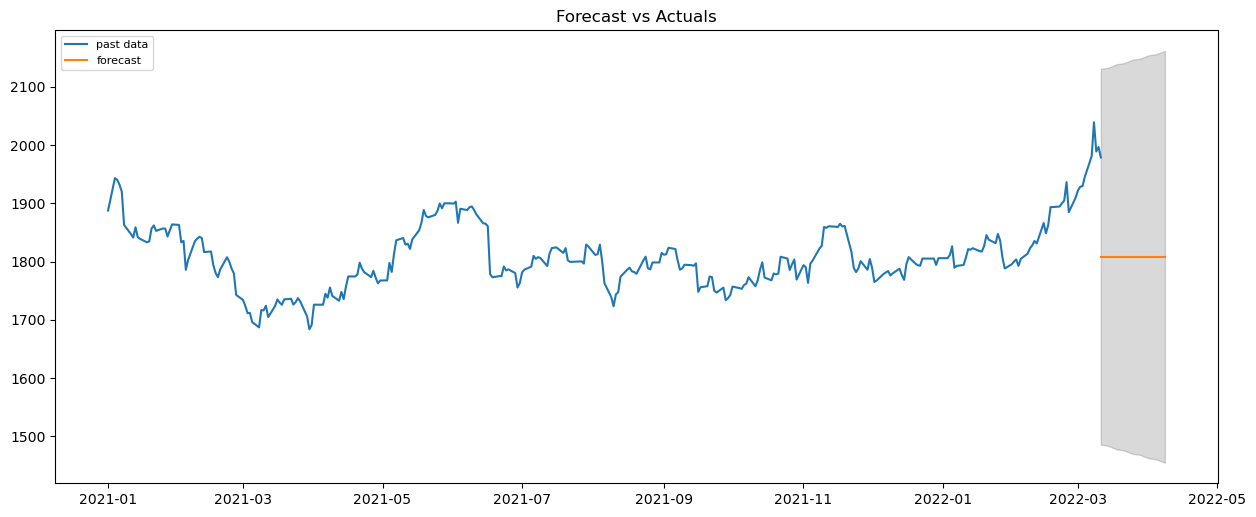

In [219]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(T[-400:], label='past data')
plt.plot(future_series, label='forecast')
plt.fill_between(lower_series_2.index, lower_series_2, upper_series_2, color='k', alpha=.15)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [233]:
next_20 = fitted.predict(start=310,end=330)
print(next_20)

2022-03-11    1996.6
2022-03-14    1978.7
2022-03-15    1978.7
2022-03-16    1978.7
2022-03-17    1978.7
2022-03-18    1978.7
2022-03-21    1978.7
2022-03-22    1978.7
2022-03-23    1978.7
2022-03-24    1978.7
2022-03-25    1978.7
2022-03-28    1978.7
2022-03-29    1978.7
2022-03-30    1978.7
2022-03-31    1978.7
2022-04-01    1978.7
2022-04-04    1978.7
2022-04-05    1978.7
2022-04-06    1978.7
2022-04-07    1978.7
2022-04-08    1978.7
Freq: B, Name: predicted_mean, dtype: float64
